In [1]:
#Classification of MNIST data

In [39]:
from __future__ import print_function, division, unicode_literals

import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)

plt.rcParams['axes.labelsize']= 14
plt.rcParams['xtick.labelsize']= 12
plt.rcParams['ytick.labelsize']= 12

#save images
PROJECT_ROOT_DIR = "."
def save_fig(fig_name, tight_layout=True):
    path= os.path.join(PROJECT_ROOT_DIR, "MNISt_images",fig_name+'.png')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)


In [6]:
from sklearn.datasets import fetch_mldata
mnist= fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [9]:
X, y= mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [76]:
some_digit= X[50000]
some_digit_image= some_digit.reshape(28,28)

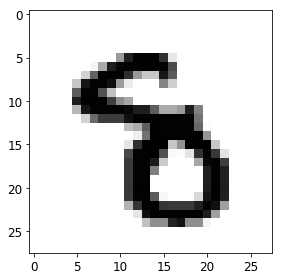

In [77]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis='off'
save_fig("eight")
plt.show()

In [78]:
y[50000]

8.0

In [79]:
#Split to train and test
X_train, X_test, y_train, y_test= X[:60000], X[60000:], y[:60000],y[60000:]

In [80]:
#Shuffle data for better cross validation
shuffle_index= np.random.permutation(60000)
X_train, y_train= X_train[shuffle_index], y_train[shuffle_index]

In [84]:
#Training binary classifier
y_train_5= (y_train==8)
y_test_5= (y_test==8)

In [85]:
#Using Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=123) 
sgd_clf.fit(X_train, y_train_8)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [86]:
sgd_clf.predict([some_digit])

#Incorrect Classification

array([False])

In [88]:
#Measure accuracy using CV

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds= StratifiedKFold(n_splits=3, random_state=123)

for train_index, test_index in skfolds.split(X_train, y_train_8):
    clone_clf= clone(sgd_clf)
    X_train_folds= X_train[train_index]
    y_train_folds= y_train_8[train_index]
    X_test_folds= X_train[test_index]
    y_test_folds= y_train_8[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct= sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.680165991700415


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8992


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7297864893244662


In [89]:
from sklearn.base import BaseEstimator

class Not8Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [91]:
from sklearn.model_selection import cross_val_score

not_8_clf= Not8Classifier()
cross_val_score(not_8_clf, X_train, y_train_8, cv=3, scoring="accuracy")

#This high accuracy is due to highly skewed data

array([0.9034 , 0.90225, 0.9018 ])

In [ ]:
#Confusion Matrix
